<a href="https://colab.research.google.com/github/niyati295/Financial-Analysis-of-Datasets/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#PredictionStockPriceswillgoupordown
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import yfinance as yf
import matplotlib.pyplot as plt


ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(data.head())
data['Next_Close'] = data['Close'].shift(-1)
data['Target'] = (data['Next_Close'] > data['Close']).astype(int)
print(data.head())
X = data[['Close']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))




[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059425  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349129  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925613  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.582657  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.750259  132079200
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059425  135480400   
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349129  146322800   
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925613  118387200   
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.58

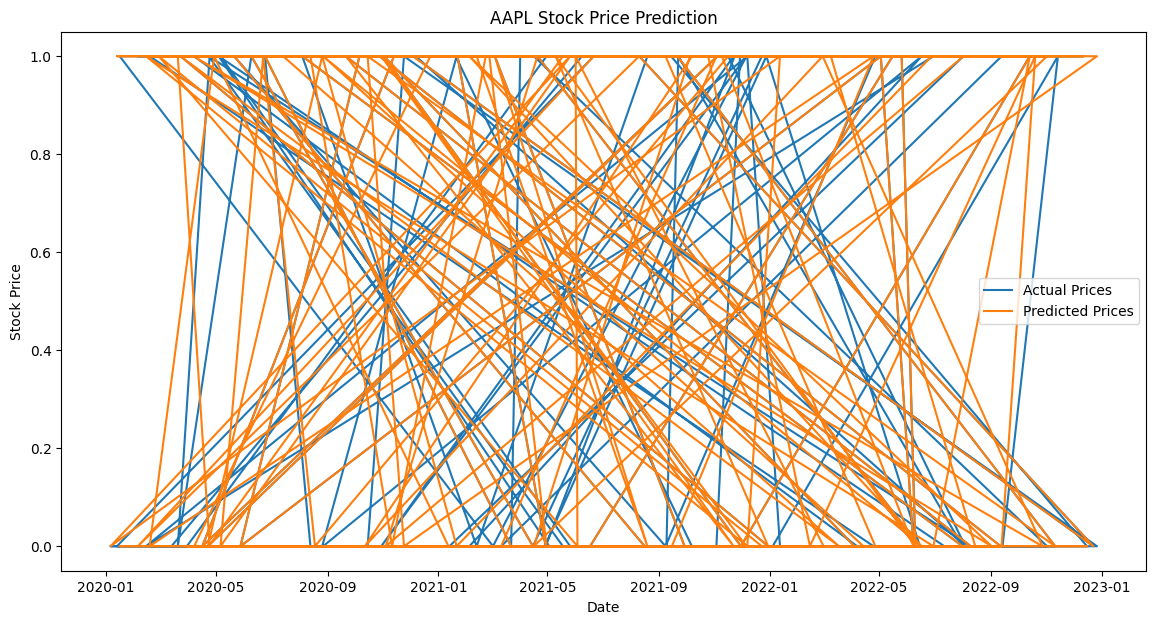

In [5]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()